In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
from scipy import interpolate as sp
import csv

In [2]:
hbar = 1.054571817e-34
C = 1e-12 # Circuit capacitance 1 pF
C_c = 5e-15 # Coupling capacitance 1 fF
C_tot = C + C_c

omega_10 = 2*np.pi*5e8 # 500 MHz
omega_20 = 2*np.pi*8e10 # 8 GHz

T_sep = 2*np.pi/omega_10 # time between pulses
K_j = 483597.8484e9 # flux quantum Hz/V
Phi_0 = 2.067833758e-15 # flux quantum Wb
V_max = 2e-3 # pulse height 2 mV
pulse_width = 1/(V_max*K_j)
pulse_width = 2e-12
delta_theta = C_c*Phi_0*np.sqrt((2*omega_10)/(hbar*C_tot))
T_tot = (int(np.pi/(2*delta_theta)) + 1) * T_sep
n = round(np.pi/(delta_theta))
print("pulse width = ",pulse_width*1e12,' ps')
print("Seperation time = ",T_sep*1e12,' ps')
print("delta theta = ",delta_theta)
print("pulses for a pi rotation = ",np.pi/(delta_theta))
print("Total time for a pi rotation= ",T_tot*1e9,' ns')
print("n = ", n)
print("expected rotation angle = ",n*delta_theta*180/np.pi,' degrees')
print("<Z> =", (np.cos(n*delta_theta)))

b = C_c*np.sqrt(hbar * omega_10 /(2*C_tot)) * (1/hbar) 

free_matrix = [0,0,0],[0,omega_10,0],[0,0,omega_20]
H_free = Qobj(free_matrix)

H_sfq = 1j*b*(create(3) - destroy(3))

Sz = [1,0,0],[0,0,0],[0,0,-1]
Sz = Qobj(Sz)
#Sx = [0,1/np.sqrt(2),0],[1/np.sqrt(2),0,1/np.sqrt(2)],[0,1/np.sqrt(2),0]
Sx = create(3) + destroy(3)
Sy =  1j * (create(3) - destroy(3))

print(H_free)
print(H_sfq)

pulse width =  2.0  ps
Seperation time =  2000.0000000000002  ps
delta theta =  0.07960758482367863
pulses for a pi rotation =  39.463484045497026
Total time for a pi rotation=  40.0  ns
n =  39
expected rotation angle =  177.8859664774331  degrees
<Z> = -0.9993193886166417
Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.14159265e+09 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.02654825e+11]]
Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0.+0.00000000e+00j 0.-1.92490292e+13j 0.+0.00000000e+00j]
 [0.+1.92490292e+13j 0.+0.00000000e+00j 0.-2.72222382e+13j]
 [0.+0.00000000e+00j 0.+2.72222382e+13j 0.+0.00000000e+00j]]


pulse width =  2.0  ps


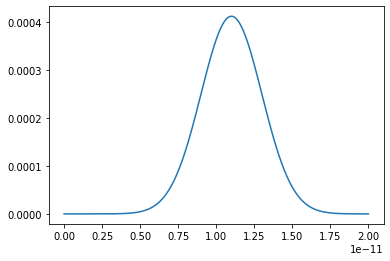

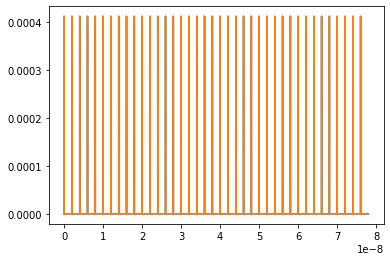

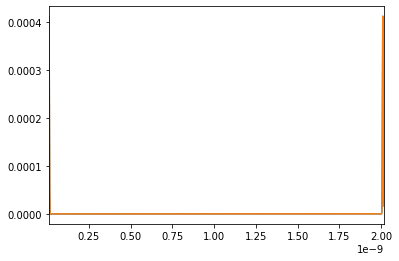

In [3]:
def normal_dist(x,x0,sigma):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-x0)**2/(2*sigma**2))

t_delay = 10e-12
n_steps = 1e6

times = np.linspace(0,t_delay + 5*pulse_width,int(n_steps))



print("pulse width = ",pulse_width*1e12,' ps')


plt.plot(times,Phi_0*normal_dist(times-t_delay,pulse_width/2,pulse_width))
plt.show()

#n=3

def normal_sfq(n,t_delay,pulse_width,T_sep,n_steps):
    n_steps = int(n_steps)
    t = np.linspace(0,t_delay + pulse_width/2 + n*T_sep,n_steps)
    pulse = Phi_0*normal_dist(t,t_delay + pulse_width/2,pulse_width)
    for i in range(n-1):
        pulse = np.add(pulse,Phi_0*normal_dist(t,t_delay + (pulse_width/2) + (i+1)*T_sep,pulse_width))
    return t,pulse

t,pulse = normal_sfq(n,t_delay,pulse_width,T_sep,n_steps)
pulse_func = sp.interp1d(t,pulse)

plt.plot(t,pulse)
plt.plot(t,pulse_func(t))
plt.show()

plt.plot(t,pulse)
plt.plot(t,pulse_func(t))
plt.xlim(t_delay,t_delay + 3*pulse_width+ T_sep)
plt.show()

In [4]:
def csv_reader(filename):
    with open(filename, 'r') as csvfile:
        reader = csv.reader(csvfile)
        data = list(reader)
    return data

In [5]:
anharm_test = np.arange(0,10,0.2)
print(anharm_test)
omega_20_test = [(n*omega_10) + (2*omega_10) for n in anharm_test]
omega_20_GHz = [i*1e-9*(1/(2*np.pi)) for i in omega_20_test]
print("omega_20 = ",omega_20_GHz," GHz")
print("omega_10= ",omega_10/(2*np.pi*1e9)," GHz")
print("freqs_tested: ",omega_20_test)


[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8 5.  5.2 5.4 5.6 5.8 6.  6.2 6.4 6.6 6.8 7.
 7.2 7.4 7.6 7.8 8.  8.2 8.4 8.6 8.8 9.  9.2 9.4 9.6 9.8]
omega_20 =  [1.0000000000000002, 1.1, 1.2, 1.3000000000000003, 1.4000000000000004, 1.5, 1.6000000000000003, 1.7000000000000004, 1.8000000000000003, 1.9000000000000004, 2.0000000000000004, 2.1000000000000005, 2.2000000000000006, 2.3000000000000003, 2.4000000000000004, 2.5, 2.6000000000000005, 2.7000000000000006, 2.8000000000000007, 2.900000000000001, 3.0, 3.1, 3.2000000000000006, 3.3000000000000003, 3.4000000000000012, 3.5000000000000004, 3.6000000000000005, 3.7, 3.800000000000001, 3.900000000000001, 4.000000000000001, 4.1000000000000005, 4.200000000000001, 4.300000000000001, 4.4, 4.5, 4.6000000000000005, 4.700000000000001, 4.8, 4.900000000000001, 5.000000000000001, 5.1000000000000005, 5.2, 5.3, 5.400000000000001, 5.500000000000001, 5.600000000000001, 5.700000000000001, 5.800000000000002

In [ ]:
theta = np.pi #rotation angle
n = round(theta/(delta_theta)) 
n_steps = 3e5
t,pulse = normal_sfq(n,t_delay,pulse_width,T_sep,n_steps)
pulse_func = sp.interp1d(t,pulse,fill_value = "extrapolate")

t,pulse = normal_sfq(n,t_delay,pulse_width,T_sep,n_steps)
pulse_func = sp.interp1d(t,pulse,fill_value = "extrapolate")

for i in range(len(omega_20_test)):
    omega_20 = omega_20_test[i]
    
    b = C_c*np.sqrt(hbar * omega_10 /(2*C_tot)) * (1/hbar) 
    free_matrix = [0,0,0],[0,omega_10,0],[0,0,omega_20]
    H_free = Qobj(free_matrix)
    H_sfq = 1j*b*(create(3) - destroy(3))

    def H1_coeffs(t,args):
        return pulse_func(t)

    H = [H_free,[H_sfq,H1_coeffs]]

    psi0 = basis(3, 0)
    
    result = sesolve(H, psi0, t,progress_bar=True)
    
    exp_0 = [abs(result.states[i][0]) for i in range(len(result.states))]
    exp_0 = [(exp_0[i][0][0])**2 for i in range(len(exp_0))]

    exp_1 = [abs(result.states[i][1]) for i in range(len(result.states))]
    exp_1 = [(exp_1[i][0][0])**2 for i in range(len(exp_1))]

    exp_2 = [abs(result.states[i][2]) for i in range(len(result.states))]
    exp_2 = [(exp_2[i][0][0])**2 for i in range(len(exp_2))]

    print(((i+1)/len(omega_20_test))*100,'%')

    path = "C:\Users\leonm\Documents\MRes\leakage_exp_data"

    filename = path+'\data_'+str(round(omega_20_test[i]/1e9,2))+'GHz.csv'

    with open(filename, 'w') as csvfile:
        writer = csv.writer(csvfile)
        for i in range(len(exp_0)):
            writer.writerow([t[i],exp_0[i],exp_1[i],exp_2[i]])

In [ ]:
P1 = []
for freq in omega_20_test:
    filename = 'data_'+str(round(freq/1e9,2))+'GHz.csv'
    data = csv_reader(filename)
    P1.append(float(data[-1][2]))

In [ ]:
omega_20_GHz = [freq/(2*np.pi*1e9) for freq in omega_20_test]

# f = sp.CubicSpline(omega_20_GHz,P1,)
# omega_plot = np.linspace(min(omega_20_GHz),max(omega_20_GHz),100)
# plt.plot(omega_plot,f(omega_plot))

plt.plot(omega_20_GHz,P1,'o--')
plt.xlabel(r'$\omega_{20}/2\pi$ (GHz)',fontsize = 16)
plt.ylabel(r'$P_1$',fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.savefig("P1_vs_omega_20_0p8_1p2GHz.png", dpi = 300, bbox_inches = 'tight')
plt.show()

anharm_x100 = [i*100 for i in anharm_test]
plt.plot(anharm_x100,P1,'o--')
plt.xlabel(r'$\eta$',fontsize = 16)
plt.ylabel(r'$P_1$',fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.savefig("P1_vs_anharm_tight.png", dpi = 300, bbox_inches = 'tight')
plt.show()